# Intro to Stats Using Linear Models
> **Briana Jimenez**
>
> *31 March 2022*
>
> [http://briana-jimenez.com/](http://briana-jimenez.com/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
# You can find the link to the data here
# ---> https://www.sheffield.ac.uk/mash/statistics/datasets

url = r'https://www.sheffield.ac.uk/polopoly_fs/1.937185!/file/Birthweight_reduced_kg_R.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


[Text(0, 0.5, 'Baby Length'), Text(0.5, 0, 'Baby Index')]

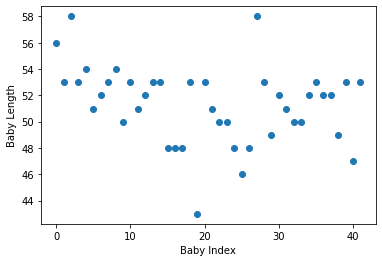

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=df.index, y=df['Length'])
ax.set(xlabel='Baby Index', ylabel='Baby Length')

In [5]:
#df['Length'].min()
#df['Length'].max()
#df['Length'].mean()
#df['Length'].median()

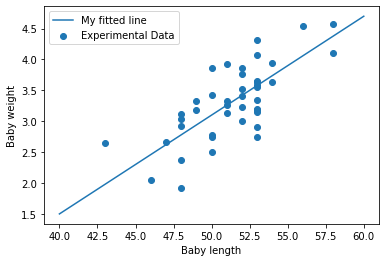

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=df['Length'], y=df['Birthweight'], label='Experimental Data')
ax.set(xlabel='Baby length', ylabel='Baby weight')

# My "fake" attempt at fitting the data without using a computer solver
x = np.linspace(40, 60, 100)
m = 0.16
b = -4.9
y = m * x + b
ax.plot(x, y, label='My fitted line')
ax.legend()

In [7]:
# This grabs the two columns we care about (x, y data)
df_sub = df[['Length', 'Birthweight']]
df_sub.head()

,Length,Birthweight
0,56,4.55
1,53,4.32
2,58,4.10
3,53,4.07
4,54,3.94


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


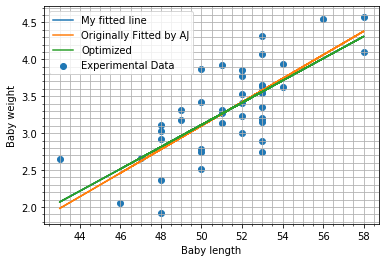

In [8]:
# This calculates the babyweight based on the baby length.
# We just have to make sure we specify a slope and intercept
# def predict_babyweight(x, m, b):
#     y = m * x + b
#     return y

m = 0.16
b = -4.9
#m = 0.2
#b = -7
m = 0.149519
b = -4.362445
df_sub['Prediction'] = m * df_sub['Length'] + b
df_sub

fig, ax = plt.subplots()
ax.scatter(x=df_sub['Length'], y=df_sub['Birthweight'], label='Experimental Data')
ax.plot(df_sub['Length'], df_sub['Prediction'], label='My fitted line')
ax.plot(df_sub['Length'], 0.16 * df_sub['Length'] + -4.9, label='Originally Fitted by AJ')
ax.plot(df_sub['Length'], 0.149519 * df_sub['Length'] + -4.362445, label='Optimized')
ax.set(xlabel='Baby length', ylabel='Baby weight')
ax.minorticks_on()
ax.grid(which='both', axis='both')

ax.legend()

In [9]:
df_sub.head()

,Length,Birthweight,Prediction
0,56,4.55,4.010619
1,53,4.32,3.562062
2,58,4.10,4.309657
3,53,4.07,3.562062
4,54,3.94,3.711581


In [10]:
df_sub['error'] = (df_sub['Birthweight'] - df_sub['Prediction'])**2
print(df_sub['error'].mean())
df_sub.head()

0.16793274648090484


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Length,Birthweight,Prediction,error
0,56,4.55,4.010619,0.290932
1,53,4.32,3.562062,0.574470
2,58,4.10,4.309657,0.043956
3,53,4.07,3.562062,0.258001
4,54,3.94,3.711581,0.052175


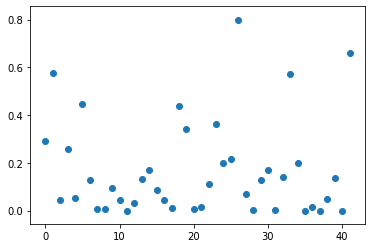

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=df_sub.index, y=df_sub['error'])

In [12]:
# Using statsmodels.api to find the best line through our data
Y = df_sub['Birthweight']
X = df_sub['Length']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    -4.362445
Length    0.149519
dtype: float64

In [13]:
df

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0
5,1636,51,3.93,38,38,0,29,0,165,61,31,16,0,180,0,0
6,820,52,3.77,34,40,0,24,0,157,50,31,16,0,173,0,0
7,1191,53,3.65,33,42,0,21,0,165,61,21,10,25,185,0,0
8,1081,54,3.63,38,38,0,18,0,172,50,20,12,7,172,0,0
9,822,50,3.42,35,38,0,20,0,157,48,22,14,0,179,0,0


In [15]:
df.iloc[2:5]

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [23]:
# This is us testing the .iloc function and explaining that it does not rely at all on what the index is
index_test = ['hello',]*len(df)
df.index = index_test
df.iloc[2:5]

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
hello,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
hello,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
hello,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [24]:
df.head(8)

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
hello,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
hello,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
hello,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
hello,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
hello,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0
hello,1636,51,3.93,38,38,0,29,0,165,61,31,16,0,180,0,0
hello,820,52,3.77,34,40,0,24,0,157,50,31,16,0,173,0,0
hello,1191,53,3.65,33,42,0,21,0,165,61,21,10,25,185,0,0


In [34]:
# When you annotate, make sure to describe what are the differences between using/not using "drop" and "inplace"
df.reset_index(drop=True, inplace=True)
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [37]:
# This is how you return all the columns in your dataframe
df.columns
df.columns[4]
df.columns[4:6]

Index(['Gestation', 'smoker'], dtype='object')

In [43]:
# This is how you return all the rows for a given column
#df['Length']
df['Length'].mean()

51.333333333333336

In [42]:
# Quick and cool way to get useful measures/or ideas about your data very quickly
df.describe()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,27.000000,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,1764.000000,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


In [48]:
df_smaller_version = df[['Length', 'Birthweight', 'Headcirc', 'Gestation']]
df_smaller_version.head()
#pd.plotting.scatter_matrix(df, alpha=0.2)

,Length,Birthweight,Headcirc,Gestation
0,56,4.55,34,44
1,53,4.32,36,40
2,58,4.10,39,41
3,53,4.07,38,44
4,54,3.94,37,42


In [50]:
df_smaller_version_alt = df[df.columns[1:5]]
df_smaller_version_alt.head()

,Length,Birthweight,Headcirc,Gestation
0,56,4.55,34,44
1,53,4.32,36,40
2,58,4.10,39,41
3,53,4.07,38,44
4,54,3.94,37,42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2378d650>,
      dtype=object)

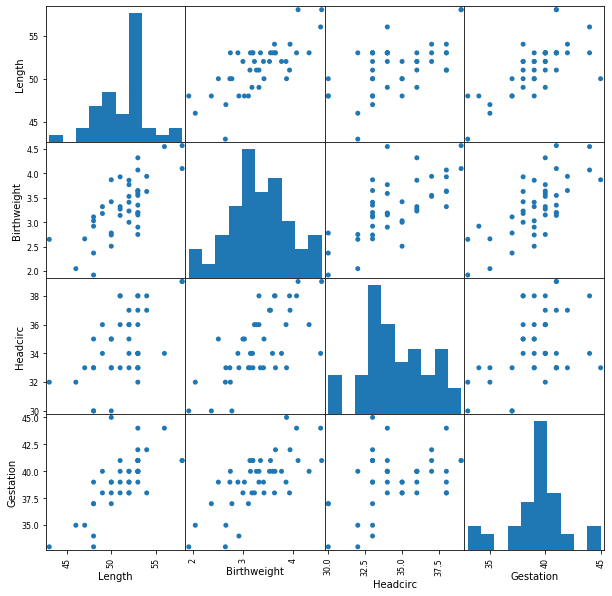

In [56]:
# Explain what this shows and why it may be important in data analytics
pd.plotting.scatter_matrix(df_smaller_version_alt, figsize=[10,10], alpha=1, s=100)

In [ ]:
# Testin save